In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip -q install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.6 MB/s eta 0:00:00


# Data Loading

Problem Statement

The objective of this dataset is to build a predictive model for diagnosing diabetes in female patients who are at least 21 years old.

The model should predict whether a patient has diabetes (Outcome = 1) or does not have diabetes (Outcome = 0) based on several diagnostic measurements, including glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.

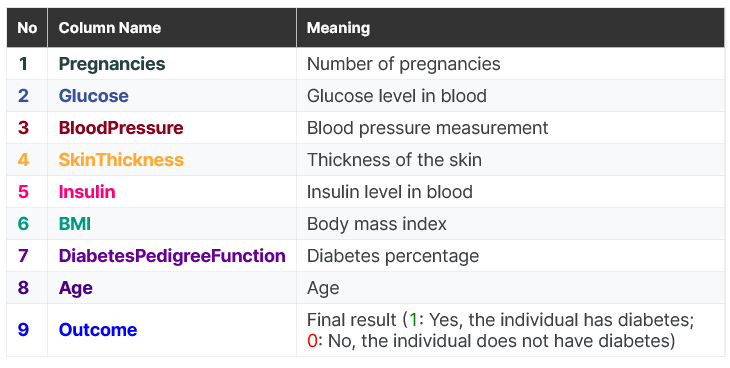

In [ ]:
data = pd.read_csv("/content/diabetes_dataset.csv")

In [ ]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
for i in data.columns:
  print(i, "\n", data[i].value_counts())
  print("-"*40)

Pregnancies 
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
----------------------------------------
Glucose 
 99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
----------------------------------------
BloodPressure 
 70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
---------------------

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

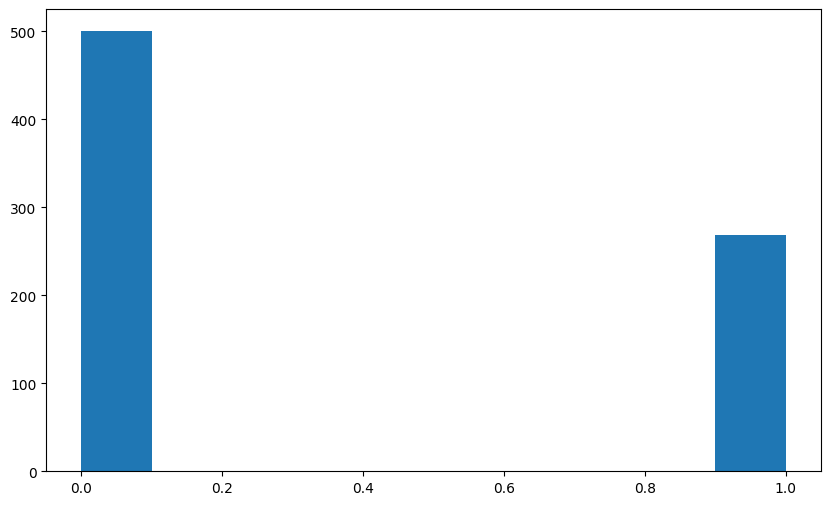

In [ ]:
plt.figure(figsize= (10,6))
plt.hist(data["Outcome"])

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis= 1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


# Modeling

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training accuracy: 0.7719869706840391


Text(0.5, 1.0, 'Train Confusion Matrix')

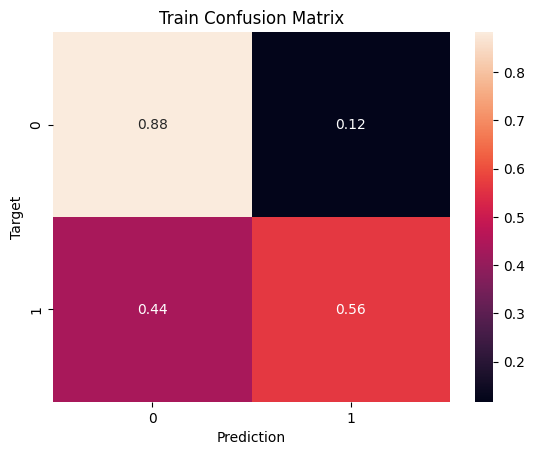

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_train = lr.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", accuracy)

cf = confusion_matrix(y_train, y_pred_train, normalize = 'true')
sns.heatmap(cf, annot= True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Train'))

Testing accuracy: 0.7467532467532467


Text(0.5, 1.0, 'Test Confusion Matrix')

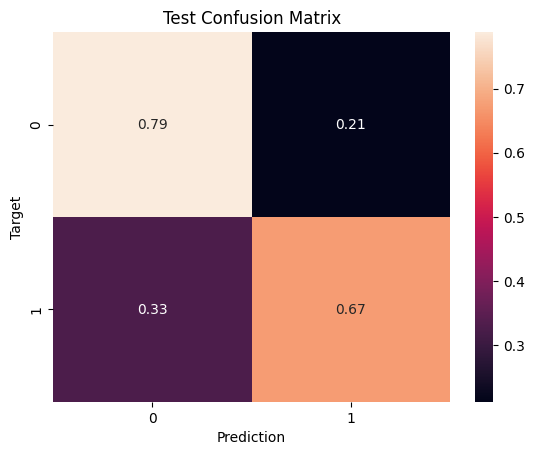

In [ ]:
y_pred_test = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy:", accuracy)

cf = confusion_matrix(y_test, y_pred_test, normalize = 'true')
sns.heatmap(cf, annot= True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Test'))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


In [ ]:
!pip -q install graphviz

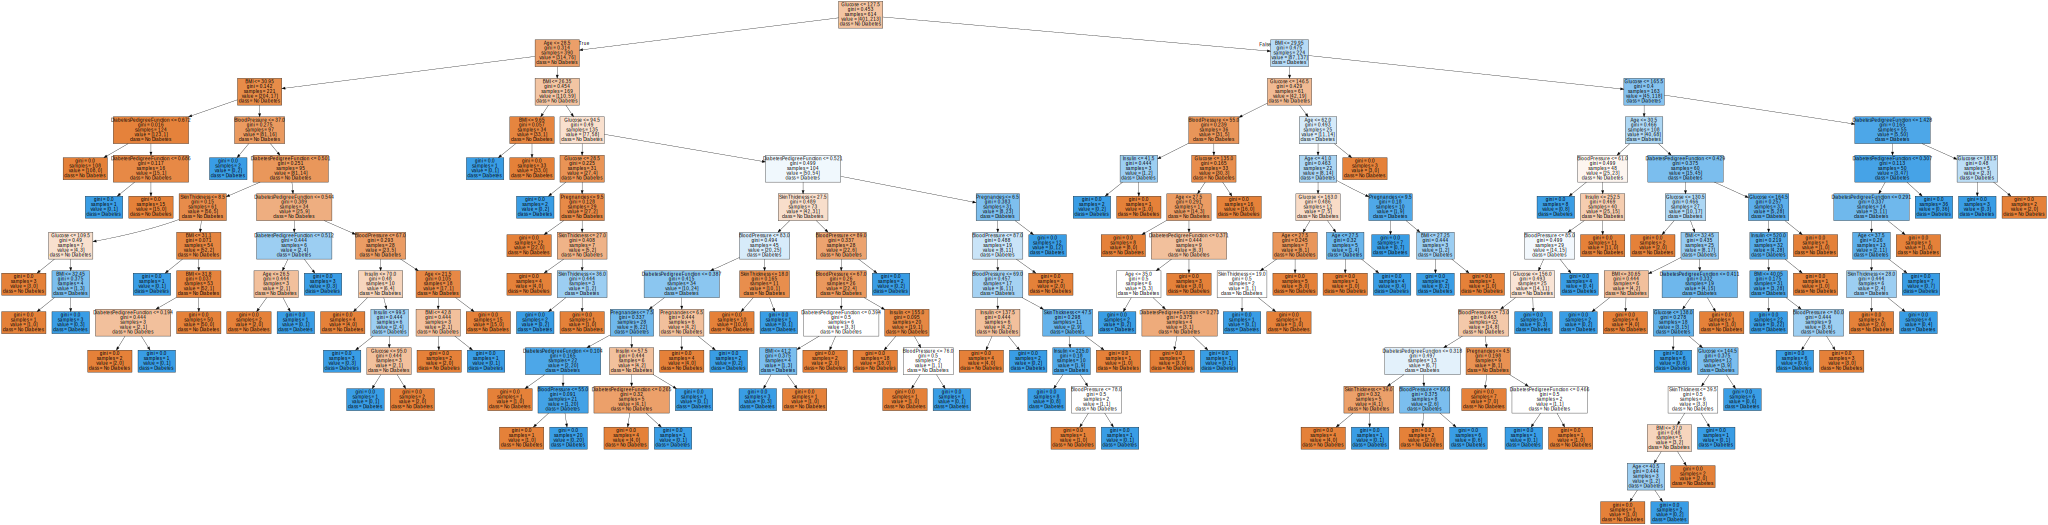

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns,
                                class_names=['No Diabetes', 'Diabetes'],
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree as a PDF file
graph

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split = 10)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7597402597402597


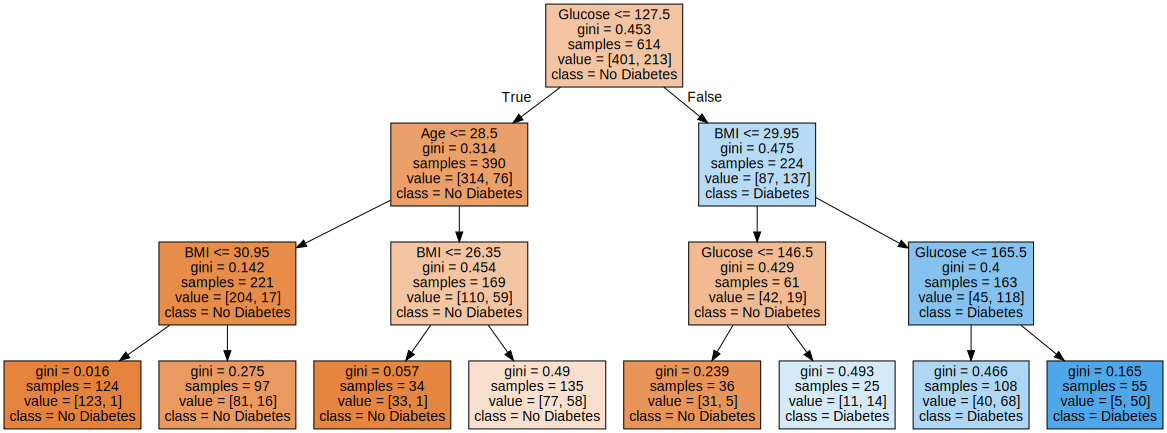

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['No Diabetes', 'Diabetes'],
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_new")  # Save the tree as a PDF file
graph

In [ ]:
param= {
    'max_depth': [2, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

Testing accuracy: 0.7597402597402597


Text(0.5, 1.0, 'Test Confusion Matrix')

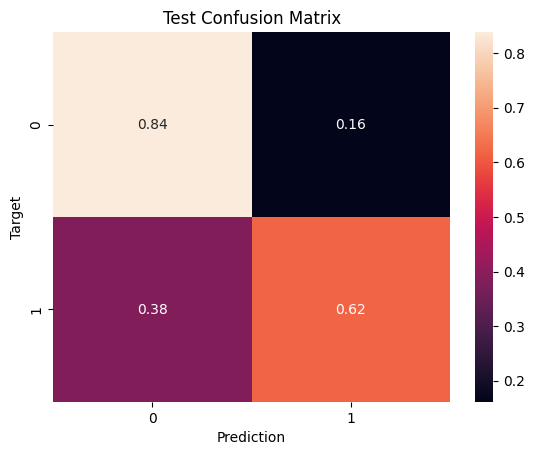

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

cf = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cf, annot= True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Test'))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


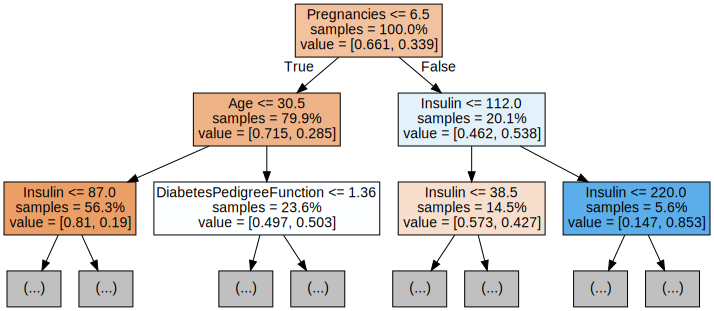

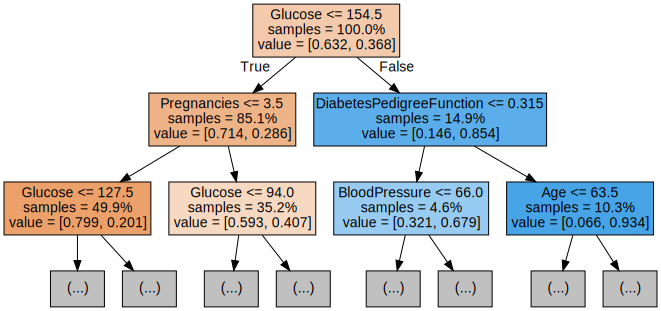

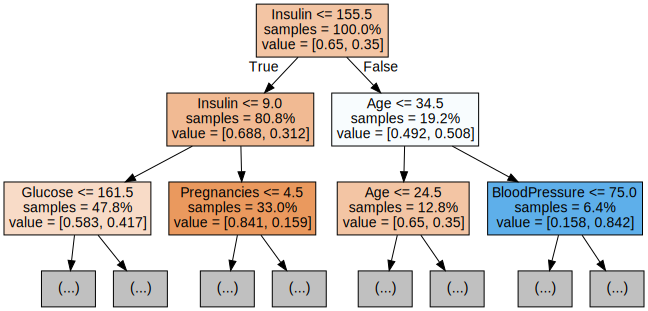

In [ ]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz

for i in range(3):
    fr = forest.estimators_[i]
    dot_data = export_graphviz(fr,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)